# Решение нелинейных уравнений

Библиотека scipy содержит эффективные методы решения нелинейных уравнений, например, метод [fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html). Входными параметрами этой процедуры является функция, ноль которой мы ищем, и начальное приближение для нуля. Так, воспользуемся этой функцией для поиска решения уравнения $f(x)=2-x-e^{-x}=0$: 

In [10]:
from scipy.optimize import fsolve
from numpy import exp

def f(x):
    return 2-x-exp(-x)

ans = fsolve(f,1)
print('Численное решение: ', ans)

Численное решение:  [1.84140566]


## Метод итераций (метод последовательных приближений)

Уравнение вида $x = 2 - e^{-x}$ не имеет аналитического решения. Одним из простейших прямолинейных методов решения является метод простых итераций. На первом шаге задаем начальное приближение корня уравнения, например, $x^{(0)} = 1$, затем в цикле вычисляем последовательные значения $x^{(1)}, x^{(2)}, ..., x^{(N)}$. Последовательность $x^{(i)}$ сходится к неподвижной точке, которая является корнем исходного уравнения 1.8414056.

In [14]:
import numpy as np 
N = 11 
x = np.empty(N, float)
x[0] = 1.
for i in range(N-1):
    x[i+1] = 2 - exp(-x[i])
    print(x[i+1])

1.6321205588285577
1.8044854658474119
1.8354408939220457
1.8404568553435368
1.841255113911434
1.8413817828128696
1.8414018735357267
1.8414050598547234
1.8414055651879888
1.8414056453310121


Процесс сходимости решения можно изобразить графически. Корень уравнения является точкой пересечения прямой $y=x$ и экспоненты $y = 2 - e^{-x}$. Красными точками на графике отмечены последовательные приближения корня. Начиная с $x^{(3)}$ точки сливаются в одну. 

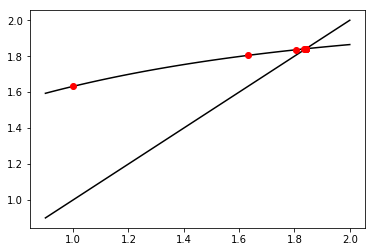

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
t = np.linspace(0.9,2,100)
plt.plot(t,t,color='black')
plt.plot(t,2-exp(-t),color='black')
plt.plot(x[:N-1],x[1:N],'ro')
plt.show()

На основе полученных результатов постройте график сходимости корня, аналигичный следующему графику ![pic](https://sites.google.com/site/procesosnumericos0241/_/rsrc/1347471302671/fixed-point-method/3.png.1347471302528.png).

При использовании этого же подхода для решения уравнения $x = e^{1-x^2}$ с начальным приближением $x^{(0)} = 0.5$ результат не сходится к одной неподвижной точке, а колеблется между двумя положениями. В этом примере метод итераций не сходится.

In [28]:
import numpy as np 
N = 11 
x = np.empty(N, float)
x[0] = 0.5
for i in range(N-1):
    x[i+1] = exp(1-x[i]*x[i])
    print(x[i+1])

2.117000016612675
0.030755419069985038
2.715711832754083
0.0017034651847384463
2.71827394057758
0.001679913095081425
2.7182741571849562
0.0016799111168229455
2.7182741572030236
0.0016799111166579386


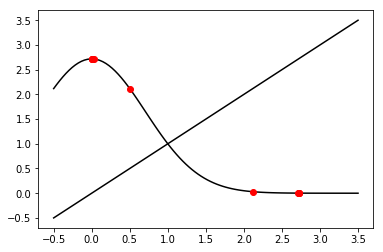

In [30]:
t = np.linspace(-0.5,3.5,100)
plt.plot(t,t,color='black')
plt.plot(t,exp(1-t*t),color='black')
plt.plot(x[:N-1],x[1:N],'ro')
plt.show()

При помощи метода простых итераций определите корень уравнения $x = \sqrt{1-\log x}$ с начальным приближением $x^{(0)} = 0.5$ и изобразите процесс сходимости графически. Сравните результат с расчетом функции fsolve.